# Space Complexity

Using the following steps:-
  - Size of lattice = N (3D)
  - Size of mag_vs_temp array = iters
  - Size of energy_vs_temp array = iters
  - Size of temp array = 200 (fixed as per code, might change as per requirement)

Therefore, total space complexity = $N^3 + 2*iters + 200$

# Time Complexity

### Using the following steps:-

  #### energy function:
  - operations per iteration: 6
  - number of iteration: N**3
  - number of addition operations = 6*N**3
  - number of matrix multiplication operations = 6*N**3
  
  #### conf_state function:
  - number of operations = delta_E's #(2) + 1 = 3
  - number of iterations = N**3
  - number of addition operations = (delta_E # + 0 )*N**3
  - number of multiplication operations =(delta_E's # + 0)*N**3
  
  #### delta_E function:
  - number of operations = 2
  - number of iterartions = 1
  - number of addition operations = 5 
  - number of multiplication operations = 1
  
  ### simulate function: THE FINAL FUNCTION WHERE ALL FUNCTIONS ABOVE ARE CALLED.
  
  #### TOTAL TIME COMPLEXITY:
  <br>
  - number of operations = conf_state's # * iters + create_lattice's # * T[2] + energy * T[2] + T[2]
  <br>
  - time complexity (big O) == $3*(N**3)*iters*T[2] + 2*T[2] + 6*(N**3)*T[2]$
  <br>
  - number of addition operations = $T[2] * (2*5*N**3*iters) + (6*N**3*iters)*T[2]$
  <br>
  - number of multiplication operations = $T[2] * ((1*2*N**3**iters) + (6*N**3*iters) )$
  

## THEORY: ALGORITHM AND MATH

The Ising model is a model used in statistical mechanics, typically to simulate magnetic systems. It consists
of a lattice with a discrete value σj (∈ {−1, 1}, in the case of this project) assigned to each point, representing
the spin at the site (down or up). The Hamiltonian of a system with a given configuration of spins is given
by

$H = -\sum_{<i,j>}J\sigma_i\sigma_j$

J is the coupling constant set as 1 (>0) for ferromagnetic substances. <i,j> refers to the nearest neighbour sum.

$\bar{E} = \sum_{<i,j>}\bar{H}$

$\bar{M} = \frac{1}{N^2}\sum_{<i,j>}\sigma_i\sigma_j$

The average energy per spin, The average magnetisation per unit spin respectively

Through this model and algorithm, we are going to show that above a critical temperature (curie temperature), the ferromagnetic substance starts losing magnetism when heated. The magnetization becomes or tends to zero. We seek to show the functional relationship between magnetization and temperature through METROPOLIS ALGORITHM.

#### The Metropolis algorithm was implemented as follows:


- An N × N matrix is used to represent a 3-D square lattice; every entry of the matrix represents a lattice site and has entry ±1, representing the spin of the particle at that site. A random matrix is initially used so that the initial configuration of spins is randomised.

 - For this system we should have N → ∞, meaning very large N, but this is very expensive computation wise. One way to increase the accuracy of the results without increasing the size of the matrix is to use periodic boundary conditions. This is easily achieved by using modulo operator: taking the neighbouring sites to be ((i + 1) % (N), j), etc., instead of ((i + 1), j), etc.

 - A lattice site is selected at random and ∆E is calculated. If ∆E ≤ 0, the change is favourable and the spin is flipped. If ∆E > 0, then the spin is flipped only if transition probability ----> exp (−∆E/kBT) > x, where x is a random number on the interval [0,1] (i.e. the particle has enough energy to flip its spin). This process is repeated for every site in the lattice, selecting the sites at random.

- A new matrix is returned, which represents the updated state of the system.

## EDGE CASES

Cases mentioned in the readMe file are the edge cases. Taking the lattice configuration to be very small, large and optimal. 


- Large lattices caused heavy computations and finite size problems. Our time complexity is the MOST OPTIMAL TIME COMPLEXITY, yet it is so high computation wise that we need heavy equipments to compute large lattices. 

- When small lattices are considered, our program gives a result which is inaccurate because it fails to change the states of all lattice sites in order to gain zero magnetization at the end. The scatter plot shows it. The only solution to these lattice size problems is to set an optimal lattice size.

- Temperature value at less than 0K does not exist and gives error in the code, obviously it shoots up our exponential function. Optimum temperarure needs to be set for the better results.

## STATUS QUO AND EFFICIENCY

The Metropolis algorithm works by randomly picking a single dipole out of the whole magnet, checking it as described above, then checking another. Now, theoretically, there should be a "critical temperature," below which it is energetically favorable for the dipoles to side with magnetism instead of temperature.

***TASK***

Take snapshots of the animation plot in the code and see the yellow colored portions (magnetization) as the temperature increases or as the video proceeds.

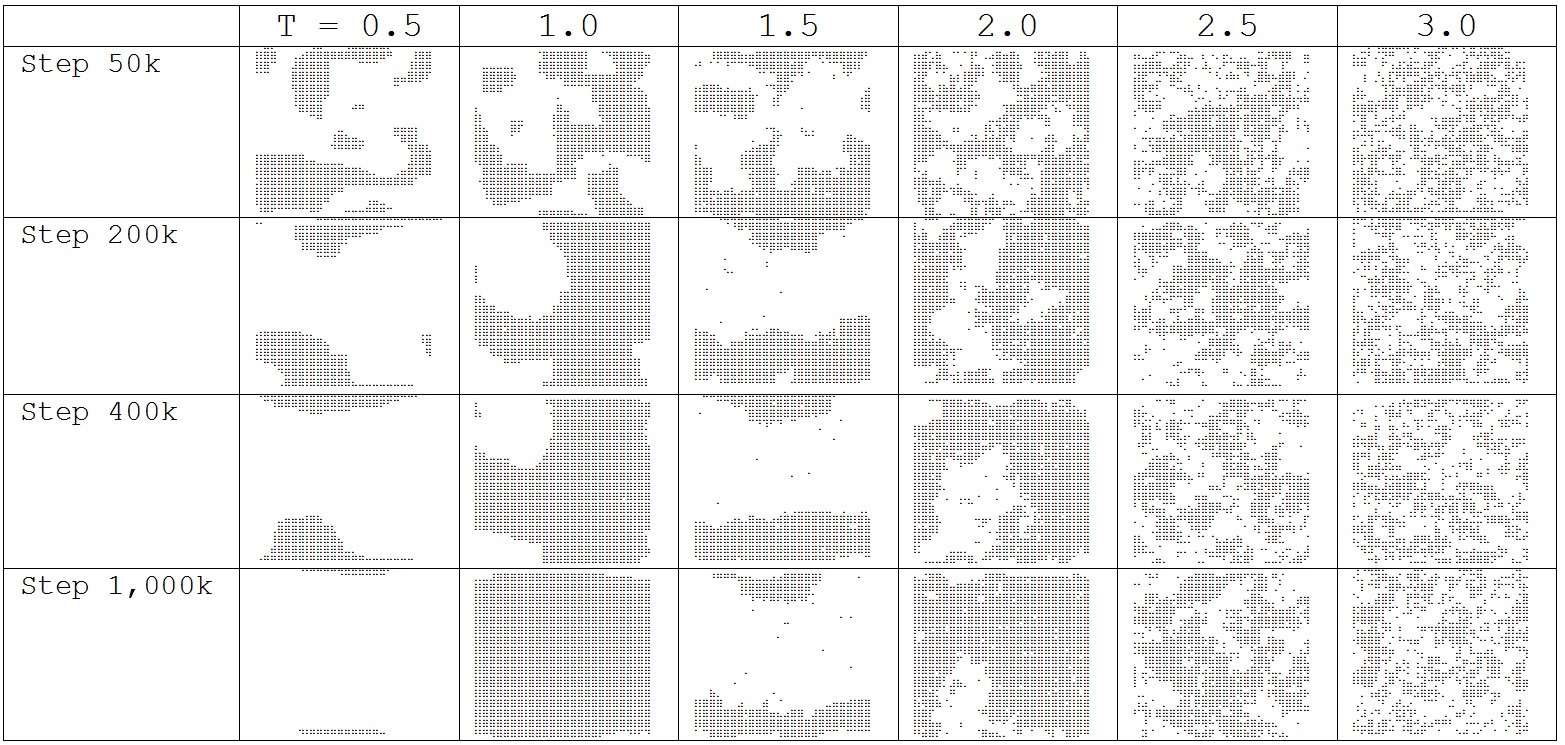

A sample picture is taken from the internet.

#### OBSERVATION

The lowest temperature systems converge much more quickly to a homogeneous magnetization, but even at 𝑇=1.5 you still see "meta-stable states." Since the efficiency is worse close to the critical point of temperature, you could say that the algorithm's efficiency is worse near the critical point of the acceptance ratio, since the acceptance is related to the temperature. Acceptance probability is $e^\frac{-2J}{T}$ which is low.

Metropolis Hashtings algorithm outperforms other heuristic methods like gibbs sampling, markov chain monte carlo, etc